# NY Medicaid Choropleth Maps


## This script contains the following points:
1. Import libraries
2. Import json NYS county mapping data
2. Import NY_county_total.csv dataset
3. Verify the dataset
4. Develop Choropleths of total population, total low income, and average monthly Medicaid beneficiaries in NYS counties
5. Examine counties with less than 500,000 people


### 1. Importing Libraries

In [1]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Import NYS county json data
NY State county data pulled from the Cornell University Geospatial Information Repository @ https://cugir.library.cornell.edu/catalog/cugir-007865

In [2]:
# Import ".json" file for NY state by county

nycounty_geo = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert\02_Data\original_data\cugir-007865-geojson.json'

In [3]:
# reviewing the JSON list for keys

f = open(r"C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert\02_Data\original_data\cugir-007865-geojson.json",)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'cugir007865.1', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.712396, 44.953008], [-74.711132, 44.953008], [-74.691251, 44.953], [-74.690671, 44.952909], [-74.689482, 44.9529], [-74.668382, 44.952777], [-74.667773, 44.95277], [-74.641872, 44.952621], [-74.636018, 44.910792], [-74.635172, 44.904471], [-74.63121, 44.875391], [-74.63048, 44.869393], [-74.629994, 44.865378], [-74.629519, 44.861096], [-74.629231, 44.859404], [-74.628731, 44.857004], [-74.628559, 44.856249], [-74.626236, 44.838506], [-74.625049, 44.830346], [-74.62294, 44.815154], [-74.622615, 44.812766], [-74.622537, 44.812195], [-74.621928, 44.807683], [-74.619921, 44.792855], [-74.617402, 44.774552], [-74.614223, 44.752374], [-74.613318, 44.74575], [-74.610841, 44.72708], [-74.607362, 44.703708], [-74.604547, 44.686315], [-74.602938, 44.67662], [-74.589474, 44.598732], [-74.571215, 44.470241], [-74.570132, 44.463396], [-74.55863, 44.385142], [-74.557046, 44.372935], [-74.5535, 44.3

### 3. Importing NY State dataset

NY State Medicaid data prepared by NYS Department of Health, Fiscal Management Group, FSSU, Data Management @ https://www.health.ny.gov/statistics/health_care/medicaid/quarterly/ssd/

In [4]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [5]:
ny_county = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'NY_county_total.csv'), index_col=False)

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 4. Verify the dataset

In [7]:
ny_county.head(60)

County  Total_Population  Sum of Total_Low_Income  \
0          Albany            304204                    74665   
1        Allegany             48946                    16451   
2          Broome            200600                    64951   
3     Cattaraugus             80317                    29283   
4          Cayuga             80026                    22934   
5      Chautauqua            134905                    49407   
6         Chemung             88830                    28180   
7        Chenango             50477                    17390   
8         Clinton             82128                    23298   
9        Columbia             63096                    16729   
10       Cortland             49336                    14994   
11       Delaware             47980                    15031   
12       Dutchess            297488                    61276   
13           Erie            919040                   270194   
14          Essex             39370                    10275   
15       Franklin             51599                    16914   
16         Fulton             55531                    19378   
17        Genesee             60079                    15181   
18         Greene             49221                    14223   
19       Hamilton              4836                     1223   
20       Herkimer             64519                    21286   
21      Jefferson            116229                    39228   
22          Lewis             27087                     9113   
23     Livingston             65393                    17137   
24        Madison             73442                    18176   
25         Monroe            744344                   218617   
26     Montgomery             50219                    20903   
27         Nassau           1339532                   198372   
28  New York City           7706403                  3002854   
29        Niagara            216469                    63009   
30         Oneida            234878                    74788   
31       Onondaga            467026                   132853   
32        Ontario            107931                    27129   
33         Orange            372813                    96789   
34        Orleans             42883                    14008   
35         Oswego            122109                    40591   
36         Otsego             62259                    18748   
37         Putnam             99710                    12914   
38     Rensselaer            159429                    40260   
39       Richmond            468730                   113881   
40       Rockland            311687                    91841   
41       Saratoga            219607                    38529   
42    Schenectady            154727                    38158   
43      Schoharie             32749                     8757   
44       Schuyler             18343                     6359   
45         Seneca             35251                    10204   
46   St. Lawrence            111944                    36312   
47        Steuben             98990                    34073   
48        Suffolk           1493350                   254912   
49       Sullivan             77547                    23618   
50          Tioga             51125                    13820   
51       Tompkins            101564                    29617   
52         Ulster            182493                    49526   
53         Warren             65707                    16625   
54     Washington             63216                    18769   
55          Wayne             93772                    25888   
56    Westchester            949113                   197655   
57        Wyoming             42155                    10737   
58          Yates             25348                     8044   

    Average Monthly Beneficiaries  
0                           43786  
1                            8696  
2                           39664  
3                         

In [8]:
ny_county.tail()

County  Total_Population  Sum of Total_Low_Income  \
54   Washington             63216                    18769   
55        Wayne             93772                    25888   
56  Westchester            949113                   197655   
57      Wyoming             42155                    10737   
58        Yates             25348                     8044   

    Average Monthly Beneficiaries  
54                          10674  
55                          15073  
56                         148301  
57                           5391  
58                           4027

In [9]:
ny_county.shape

(59, 4)

In [10]:
ny_county.columns

Index(['County', 'Total_Population', 'Sum of Total_Low_Income',
       'Average Monthly Beneficiaries'],
      dtype='object')

In [11]:
ny_county.dtypes

County                           object
Total_Population                  int64
Sum of Total_Low_Income           int64
Average Monthly Beneficiaries     int64
dtype: object

### 5. Develop Choropleths of total population, total low income, and average monthly Medicaid beneficiaries in NYS counties

In [20]:
ny_county['County'] = ny_county['County'].str.title()

In [90]:
# Choropleth of Total Population
data_to_plot = ny_county[['County','Total_Population']]

In [91]:
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Total_Population'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Population").add_to(map)
folium.LayerControl().add_to(map)

map

In [92]:
# Choropleth of Total Low Income
data_to_plot = ny_county[['County','Sum of Total_Low_Income']]

In [93]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Sum of Total_Low_Income'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Low Income").add_to(map)
folium.LayerControl().add_to(map)

map

In [94]:
# Choropleth of average monthly beneficiaries
data_to_plot = ny_county[['County','Average Monthly Beneficiaries']]

In [95]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Average Monthly Beneficiaries'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Medicaid Beneficiaries (2014)").add_to(map)
folium.LayerControl().add_to(map)

map

<AxesSubplot:xlabel='Total_Population', ylabel='Count'>

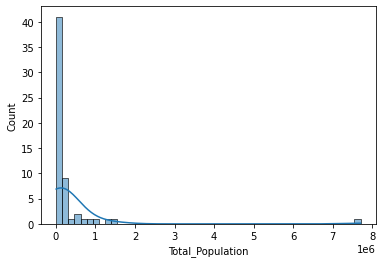

In [96]:
# Histogram of total SNAP benefits
sns.histplot(ny_county['Total_Population'], bins=50, kde = True)

The largest counties, in particular NY City area counties, are serving as outliers and making it difficult to visual smaller and less urban counties.

### 6. Examine counties with no more than 100,000 people

Eliminating the population of the largest urban areas such as New York City to get a better view of the counties with small populations.

In [12]:
# sort counties by total population with  <= 100,000 as the divider
ny_county.loc[ny_county['Total_Population'] <= 100000, 'Population_flag'] = 'Low_Population'

In [13]:
# sort counties by total population between 100,000 and 500,000 as the divider
ny_county.loc[(ny_county ['Total_Population'] < 500000) & (ny_county ['Total_Population'] > 100000), 'Population_flag'] = 'Medium_Population'

In [14]:
ny_county.loc[ny_county['Total_Population'] >= 500000, 'Population_flag'] = 'High_Population'

In [15]:
ny_county.head(50)

County  Total_Population  Sum of Total_Low_Income  \
0          Albany            304204                    74665   
1        Allegany             48946                    16451   
2          Broome            200600                    64951   
3     Cattaraugus             80317                    29283   
4          Cayuga             80026                    22934   
5      Chautauqua            134905                    49407   
6         Chemung             88830                    28180   
7        Chenango             50477                    17390   
8         Clinton             82128                    23298   
9        Columbia             63096                    16729   
10       Cortland             49336                    14994   
11       Delaware             47980                    15031   
12       Dutchess            297488                    61276   
13           Erie            919040                   270194   
14          Essex             39370                    10275   
15       Franklin             51599                    16914   
16         Fulton             55531                    19378   
17        Genesee             60079                    15181   
18         Greene             49221                    14223   
19       Hamilton              4836                     1223   
20       Herkimer             64519                    21286   
21      Jefferson            116229                    39228   
22          Lewis             27087                     9113   
23     Livingston             65393                    17137   
24        Madison             73442                    18176   
25         Monroe            744344                   218617   
26     Montgomery             50219                    20903   
27         Nassau           1339532                   198372   
28  New York City           7706403                  3002854   
29        Niagara            216469                    63009   
30         Oneida            234878                    74788   
31       Onondaga            467026                   132853   
32        Ontario            107931                    27129   
33         Orange            372813                    96789   
34        Orleans             42883                    14008   
35         Oswego            122109                    40591   
36         Otsego             62259                    18748   
37         Putnam             99710                    12914   
38     Rensselaer            159429                    40260   
39       Richmond            468730                   113881   
40       Rockland            311687                    91841   
41       Saratoga            219607                    38529   
42    Schenectady            154727                    38158   
43      Schoharie             32749                     8757   
44       Schuyler             18343                     6359   
45         Seneca             35251                    10204   
46   St. Lawrence            111944                    36312   
47        Steuben             98990                    34073   
48        Suffolk           1493350                   254912   
49       Sullivan             77547                    23618   

    Average Monthly Beneficiaries    Population_flag  
0                           43786  Medium_Population  
1                            8696     Low_Population  
2                           39664  Medium_Population  
3                           15125     Low_Population  
4                           13683     Low_Population  
5                           30268  Medium_Population  
6                           17994     Low_Population  
7                            9844     Low_Population  
8                           14817     Low_Population  
9                            9871     Low_Population  
10                           9248     Low_Population  
11                           8159     Low_Population  
12                          372

In [16]:
# selecting rows based on 'low population' condition

name = ['Low_Population']

ny_county2 = ny_county.loc[ny_county['Population_flag'].isin(name)]

In [32]:
ny_county2.head(100)

County  Total_Population  Sum of Total_Low_Income  \
1      Allegany             48946                    16451   
3   Cattaraugus             80317                    29283   
4        Cayuga             80026                    22934   
6       Chemung             88830                    28180   
7      Chenango             50477                    17390   
8       Clinton             82128                    23298   
9      Columbia             63096                    16729   
10     Cortland             49336                    14994   
11     Delaware             47980                    15031   
14        Essex             39370                    10275   
15     Franklin             51599                    16914   
16       Fulton             55531                    19378   
17      Genesee             60079                    15181   
18       Greene             49221                    14223   
19     Hamilton              4836                     1223   
20     Herkimer             64519                    21286   
22        Lewis             27087                     9113   
23   Livingston             65393                    17137   
24      Madison             73442                    18176   
26   Montgomery             50219                    20903   
34      Orleans             42883                    14008   
36       Otsego             62259                    18748   
37       Putnam             99710                    12914   
43    Schoharie             32749                     8757   
44     Schuyler             18343                     6359   
45       Seneca             35251                    10204   
47      Steuben             98990                    34073   
49     Sullivan             77547                    23618   
50        Tioga             51125                    13820   
53       Warren             65707                    16625   
54   Washington             63216                    18769   
55        Wayne             93772                    25888   
57      Wyoming             42155                    10737   
58        Yates             25348                     8044   

    Average Monthly Beneficiaries Population_flag  
1                            8696  Low_Population  
3                           15125  Low_Population  
4                           13683  Low_Population  
6                           17994  Low_Population  
7                            9844  Low_Population  
8                           14817  Low_Population  
9                            9871  Low_Population  
10                           9248  Low_Population  
11                           8159  Low_Population  
14                           5949  Low_Population  
15                           9143  Low_Population  
16                          12008  Low_Population  
17                           8381  Low_Population  
18                           8354  Low_Population  
19                            620  Low_Population  
20                          13002  Low_Population  
22                           4498  Low_Population  
23                           8971  Low_Population  
24                          10879  Low_Population  
26                          11868  Low_Population  
34                           8195  Low_Population  
36                           9578  Low_Population  
37                           6940  Low_Population  
43                           4971  Low_Population  
44                           3474  Low_Population  
45                           5483  Low_Population  
47                          18376  Low_Population  
49                          18121  Low_Population  
50                           8062  Low_Population  
53                          10173  Low_Population  
54                          10674  Low_Population  
55                          15073  Low_Population  
57                           5391  Low_Population  
58                           4027  Low_Population

### My initial questions to explore included identifying the relationship of access to food resources via census tract and if there are relationships to locations such as rural vs. urban, particularly in the upstate New York region; identifying if there is a relationship between population size and access to food resources; and highlighting areas where there are significant gaps in access to food resources.

The choropleths helped to visualize the locations of the various low income, low access tracts at the county level across NYS.  The choropleths suggest a relationship between population size, low income regions, regions with greater SNAP utilization, and access to grocery stores.  

I had been considering focusing on the counties in the Capital Region where I live.  However, the choropleths suggest that gaps are largely absent in this region, and highlight that gaps exist further north, south and west of the Albany region.   As a result, I will be focusing attention on these regions.

In [18]:
# Choropleth of Total Population
data_to_plot = ny_county2[['County','Total_Population']]

In [19]:
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Total_Population'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Population").add_to(map)
folium.LayerControl().add_to(map)

map

In [20]:
# Choropleth of Total Population
data_to_plot = ny_county2[['County','Sum of Total_Low_Income']]

In [21]:
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Sum of Total_Low_Income'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Low Income").add_to(map)
folium.LayerControl().add_to(map)

map

In [22]:
# Choropleth of average monthly beneficiaries
data_to_plot = ny_county2[['County','Average Monthly Beneficiaries']]

In [23]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Average Monthly Beneficiaries'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Medicaid Beneficiaries (2014)").add_to(map)
folium.LayerControl().add_to(map)

map

The Counties with the greatest number of average monthly beneficiaries are Steuben, Sullivan, Chemung, Cattaraugus, Wayne, Clinton, Cayuga, Herkimer, Fulton, Montgomery, Madison, Washington and Warren Counties.

In [29]:
ny_county2.to_csv(os.path.join(path, '02_Data', 'cleaned_data', 'NY_county3_total.csv'))

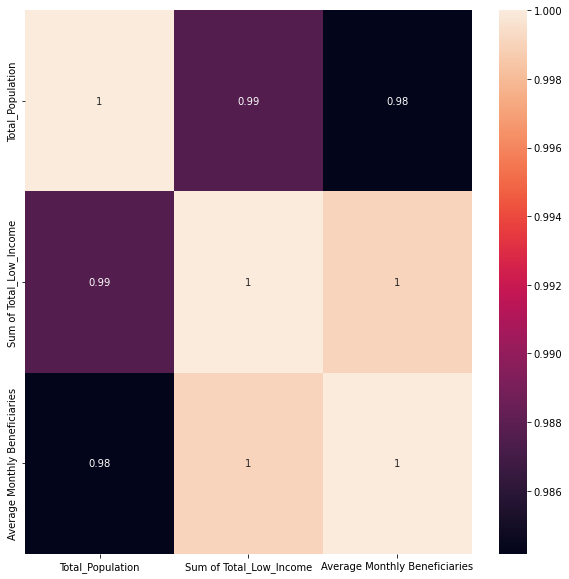

In [25]:
# using matplotlib to create a subplot
f,ax = plt.subplots(figsize=(10,10))

# using seaborn to create a heatmap of the correlation matrix and subplots of all NY counties
corr1 = sns.heatmap(ny_county.corr(), annot = True, ax = ax)

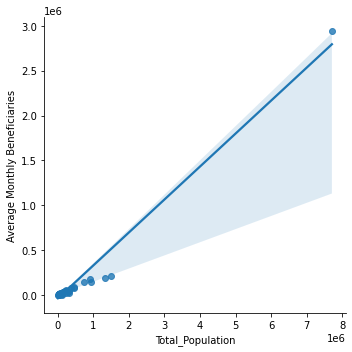

In [26]:
# creating a scatterplot for the "Average Monthly Income" and "Total Population" columns in seaborn for all NY counties
scat_1 = sns.lmplot(x = 'Total_Population', y = 'Average Monthly Beneficiaries', data = ny_county)

In [30]:
scat_1.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_NY1.png'))

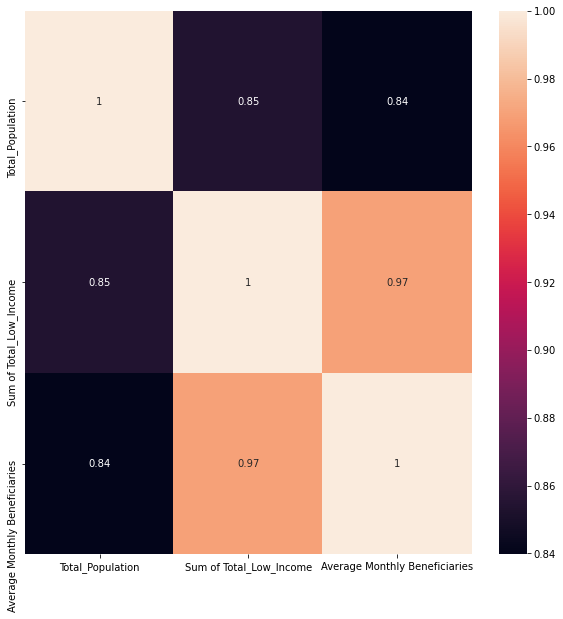

In [122]:
# using matplotlib to create a si
f,ax = plt.subplots(figsize=(10,10))

# using seaborn to create a heatmap of the correlation matrix and subplots of small NY counties
corr1 = sns.heatmap(ny_county2.corr(), annot = True, ax = ax)

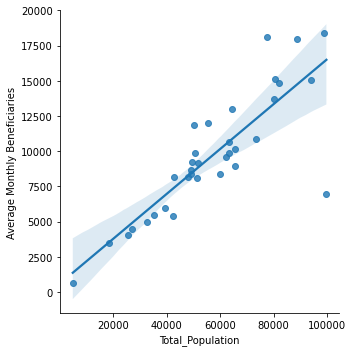

In [27]:
# creating a scatterplot for the "Average Monthly Income" and "Total Population" columns in seaborn for small NY counties
scat_2= sns.lmplot(x = 'Total_Population', y = 'Average Monthly Beneficiaries', data = ny_county2)

In [31]:
scat_2.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_NY2.png'))

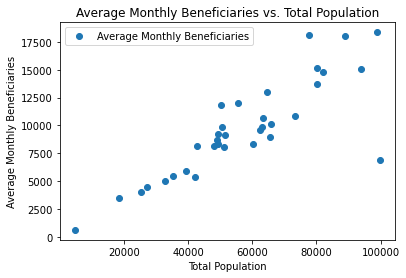

In [33]:
ny_county2.plot(x = 'Total_Population', y='Average Monthly Beneficiaries',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Monthly Beneficiaries vs. Total Population')  
plt.xlabel('Total Population')  
plt.ylabel('Average Monthly Beneficiaries')  
plt.show()

In [34]:
X = ny_county2['Total_Population'].values.reshape(-1,1)
y = ny_county2['Average Monthly Beneficiaries'].values.reshape(-1,1)

In [35]:
X

array([[48946],
       [80317],
       [80026],
       [88830],
       [50477],
       [82128],
       [63096],
       [49336],
       [47980],
       [39370],
       [51599],
       [55531],
       [60079],
       [49221],
       [ 4836],
       [64519],
       [27087],
       [65393],
       [73442],
       [50219],
       [42883],
       [62259],
       [99710],
       [32749],
       [18343],
       [35251],
       [98990],
       [77547],
       [51125],
       [65707],
       [63216],
       [93772],
       [42155],
       [25348]], dtype=int64)

In [36]:
y

array([[ 8696],
       [15125],
       [13683],
       [17994],
       [ 9844],
       [14817],
       [ 9871],
       [ 9248],
       [ 8159],
       [ 5949],
       [ 9143],
       [12008],
       [ 8381],
       [ 8354],
       [  620],
       [13002],
       [ 4498],
       [ 8971],
       [10879],
       [11868],
       [ 8195],
       [ 9578],
       [ 6940],
       [ 4971],
       [ 3474],
       [ 5483],
       [18376],
       [18121],
       [ 8062],
       [10173],
       [10674],
       [15073],
       [ 5391],
       [ 4027]], dtype=int64)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

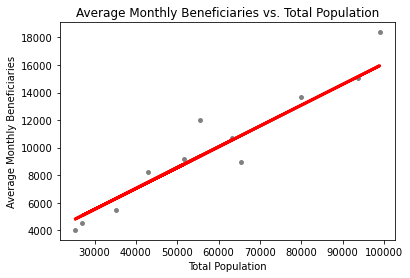

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Monthly Beneficiaries vs. Total Population')
plot_test.xlabel('Total Population')
plot_test.ylabel('Average Monthly Beneficiaries')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15111173]]
Mean squared error:  1738375.8055227364
R2 score:  0.9068781567200445


In [44]:
y_predicted

array([[ 9378.79604153],
       [ 7467.5349273 ],
       [ 6314.25023218],
       [10869.0598863 ],
       [13080.27777723],
       [15945.96055478],
       [15157.45956695],
       [ 5080.57409867],
       [ 8784.62473372],
       [ 4817.79080664],
       [10540.08965814]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0    12008   9378.796042
1     8195   7467.534927
2     5483   6314.250232
3     8971  10869.059886
4    13683  13080.277777
5    18376  15945.960555
6    15073  15157.459567
7     4498   5080.574099
8     9143   8784.624734
9     4027   4817.790807
10   10674  10540.089658

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15111173]]
Mean squared error:  7083534.170986787
R2 score:  0.5984107990348365


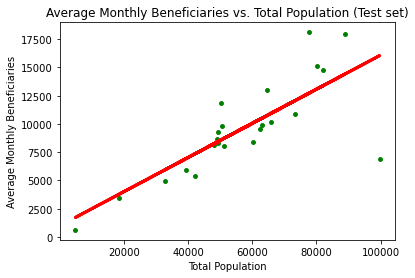

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average Monthly Beneficiaries vs. Total Population (Test set)')
plot_test.xlabel('Total Population')
plot_test.ylabel('Average Monthly Beneficiaries')
plot_test.show()